#**Imports and Dataset Preparation:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
data = load_iris()
feature_names = data.feature_names
target_names = data.target_names
X = data.data
y = data.target
print(feature_names)
print(target_names)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
X_df = pd.DataFrame(X, columns=data.feature_names)

In [ ]:
X_train_df =  pd.DataFrame(X_train, columns=data.feature_names)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#**PDP**

**Refernce:**

https://scikit-learn.org/stable/modules/partial_dependence.html


In [ ]:
X_test.shape

(30, 4)

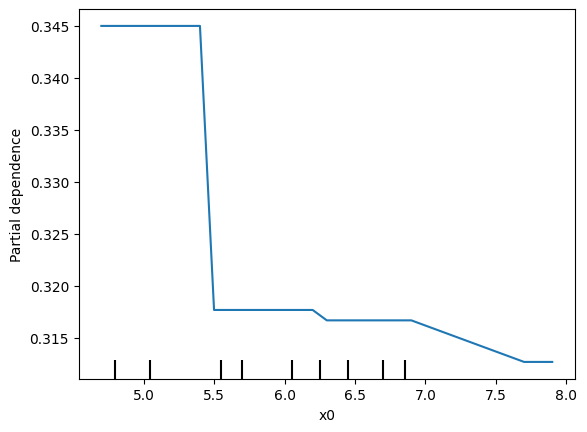

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Use PDP on Specific Features ---> feature vraiable has the idx of the required feature
feature = [0]

# As the Iris dataset, which is a multi-class classification problem (3 classes: Setosa, Versicolor, Virginica),
  # PartialDependenceDisplay requires you to specify which class's probability you want to visualize.
target_class = 0  # choose the class you want PDP for

PartialDependenceDisplay.from_estimator(rf, X_test, features=feature, target=target_class)
plt.show()

In [ ]:
# If you need the raw values of the partial dependence function rather than the plots, you can use:

from sklearn.inspection import partial_dependence

results = partial_dependence(rf, X_test, [0])  # [0] id the index of the required feature
print(results["average"])
print(" ---------------------------------------------------------- ")
print(results["grid_values"])
# The values field returned by sklearn.inspection.partial_dependence gives
 # the actual values used in the grid for each input feature of interest.
  # They also correspond to the axis of the plots.

[[0.345      0.345      0.345      0.345      0.345      0.345
  0.31766667 0.31766667 0.31766667 0.31766667 0.31766667 0.31766667
  0.31766667 0.31666667 0.31666667 0.31666667 0.31666667 0.31666667
  0.31666667 0.31266667 0.31266667]
 [0.27233333 0.27233333 0.27233333 0.32266667 0.32433333 0.32033333
  0.32633333 0.32033333 0.32033333 0.32133333 0.327      0.31333333
  0.311      0.306      0.31333333 0.31333333 0.32266667 0.322
  0.32533333 0.29333333 0.29333333]
 [0.38266667 0.38266667 0.38266667 0.33233333 0.33066667 0.33466667
  0.356      0.362      0.362      0.361      0.35533333 0.369
  0.37133333 0.37733333 0.37       0.37       0.36066667 0.36133333
  0.358      0.394      0.394     ]]
 ---------------------------------------------------------- 
[array([4.7, 4.8, 4.9, 5. , 5.1, 5.4, 5.5, 5.6, 5.7, 5.8, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.7, 6.8, 6.9, 7.7, 7.9])]


#**ICE**

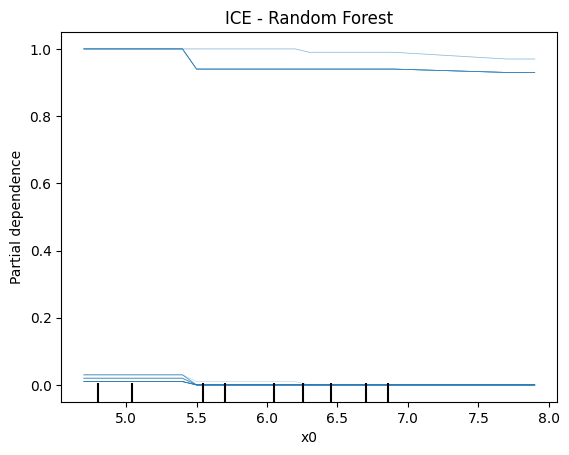

In [ ]:
# ICE is included with PDP in sklearn
PartialDependenceDisplay.from_estimator(rf, X_test, features=feature, target=target_class, kind='individual')
plt.title("ICE - Random Forest")
plt.show()

#**ALE:**

Refernace:

https://docs.seldon.io/projects/alibi/en/latest/examples/ale_classification.html

In [ ]:
!pip install alibi

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

In [ ]:
data = load_iris()
feature_names = data.feature_names
target_names = data.target_names
X = data.data
y = data.target
print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

1.0

In [ ]:
logit_fun_lr = lr.decision_function
proba_fun_lr = lr.predict_proba

In [ ]:
logit_ale_lr = ALE(logit_fun_lr, feature_names=feature_names, target_names=target_names)
proba_ale_lr = ALE(proba_fun_lr, feature_names=feature_names, target_names=target_names)

In [ ]:
logit_exp_lr = logit_ale_lr.explain(X_train)
proba_exp_lr = proba_ale_lr.explain(X_train)

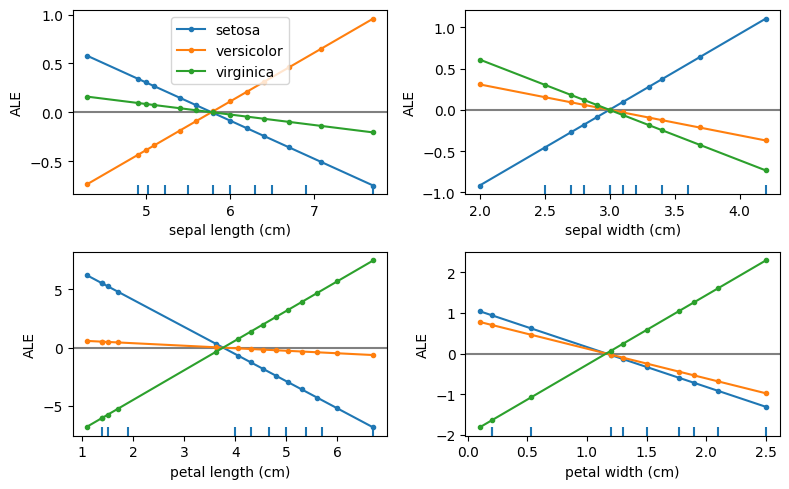

In [ ]:
plot_ale(logit_exp_lr, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None);

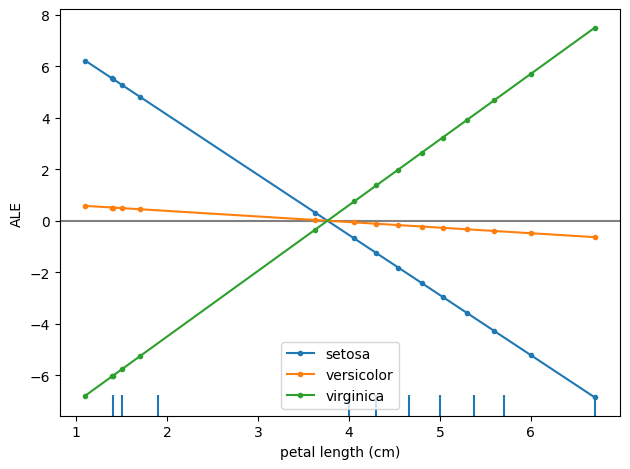

In [ ]:
plot_ale(logit_exp_lr, features=[2]);

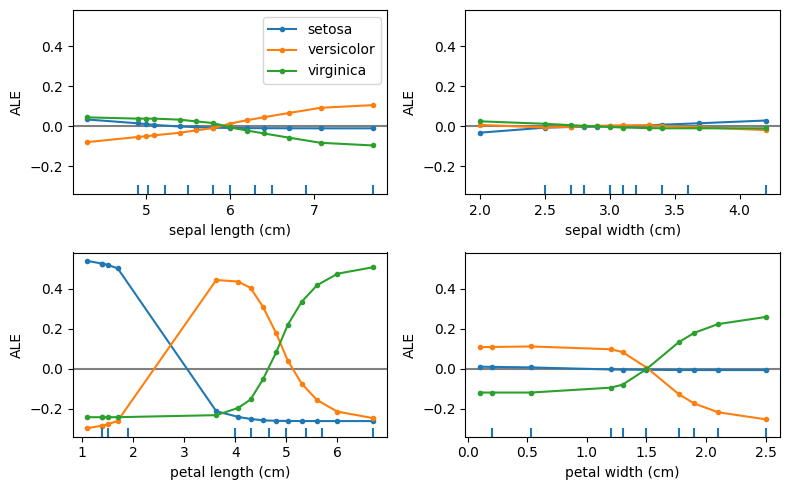

In [ ]:
plot_ale(proba_exp_lr, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5});

In [ ]:
for feature in range(4):
    print(proba_exp_lr.ale_values[feature].sum())
'''
By transforming the ALE plots into probability space we can gain additional insight into the model behaviour.
For example, the ALE curve for the feature petal width and class setosa is virtually flat.
This means that the model does not use this feature to assign higher or lower probability to class setosa with respect to ...
the average effect of that feature.
This is not readily seen in logit space as the ALE curve has negative slope which would lead us to the opposite conclusion.
The interpretation here is that even though the ALE curve in the logit space shows a negative effect with feature value,
the effect in the logit space is not significant enough to translate into a tangible effect in the probability space.
Turning to the feature petal length we can observe a much more nuanced behaviour of the ALE plots than we saw in the logit space previously.
In particular, for the target class versicolor, whilst the ALE curve is nearly flat in the logit space,
in probability space it reveals a significant uplift over the average effect of petal length towards predicting versicolor in an interval between ~3-5cm.
This agrees with our observation previously that the histogram of petal length by target class reveals that the feature can separate all three classes quite well.
Finally, the feature sepal width does not offer significant information to the model to prefer any class over the other (with respect to the mean effect of sepal_width that is).
''';

1.3877787807814457e-17
-1.1796119636642288e-16
4.440892098500626e-16
-1.6653345369377348e-16


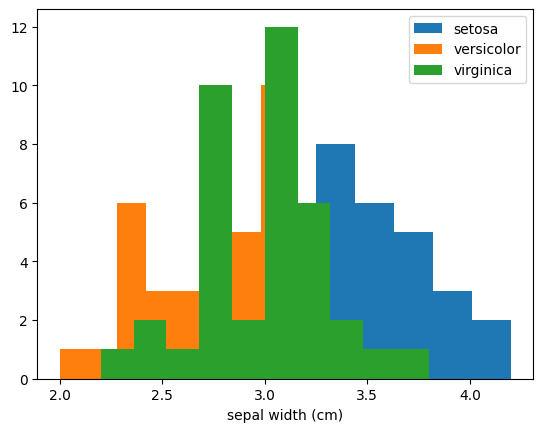

In [ ]:
'''
If we plot the marginal distribution of sepal_width,
it explains why that is—the overlap in the class conditional histograms of this feature show that it does not increase the model discriminative power:
'''
fig, ax = plt.subplots()
for target in range(3):
    ax.hist(X_train[y_train==target][:,1], label=target_names[target]);

ax.set_xlabel(feature_names[1])
ax.legend();

##**Comparing ALE between models:**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
accuracy_score(y_test, gb.predict(X_test))
logit_fun_gb = gb.decision_function
proba_fun_gb = gb.predict_proba
logit_ale_gb = ALE(logit_fun_gb, feature_names=feature_names, target_names=target_names)
proba_ale_gb = ALE(proba_fun_gb, feature_names=feature_names, target_names=target_names)
logit_exp_gb = logit_ale_gb.explain(X_train)
proba_exp_gb = proba_ale_gb.explain(X_train)

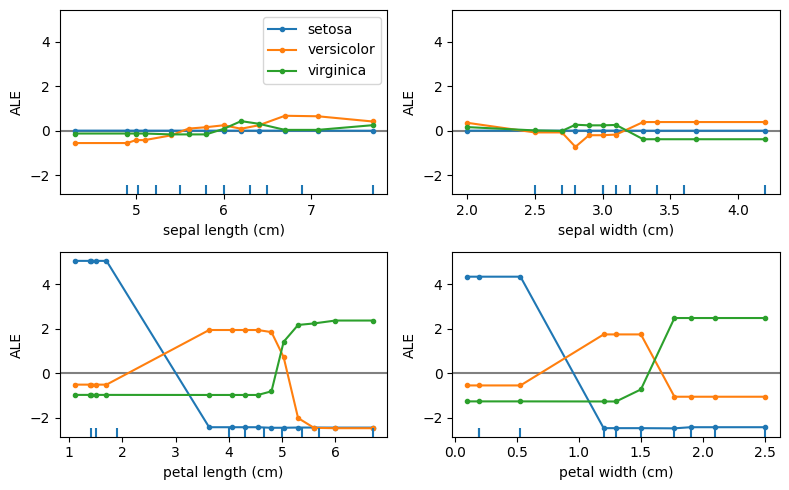

In [ ]:
plot_ale(logit_exp_gb, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5});

In [ ]:
gb.feature_importances_

array([0.00220334, 0.01657635, 0.50371177, 0.47750855])

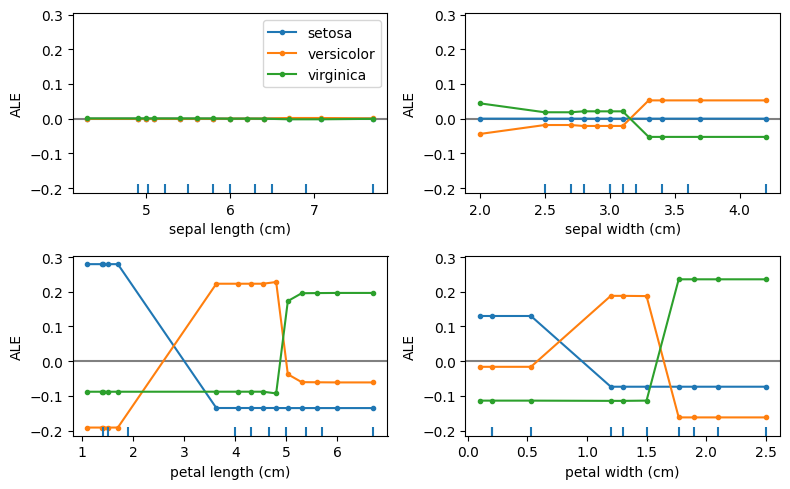

In [ ]:
plot_ale(proba_exp_gb, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5});

**Comparison:**

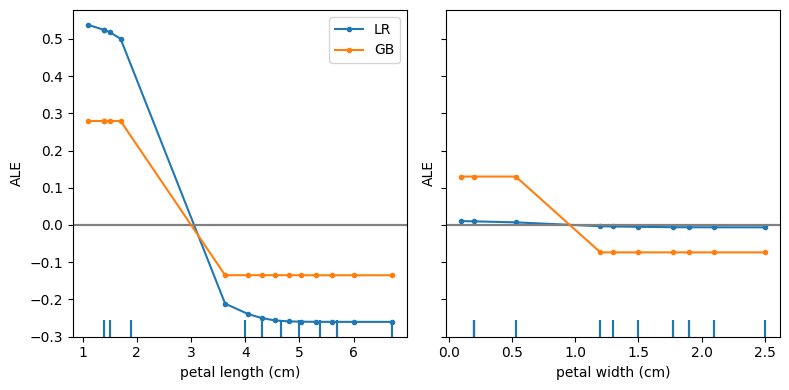

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=[2, 3], targets=['setosa'], ax=ax, line_kw={'label': 'LR'});
plot_ale(proba_exp_gb, features=[2, 3], targets=['setosa'], ax=ax, line_kw={'label': 'GB'});

#**Permutation Feature Importance**

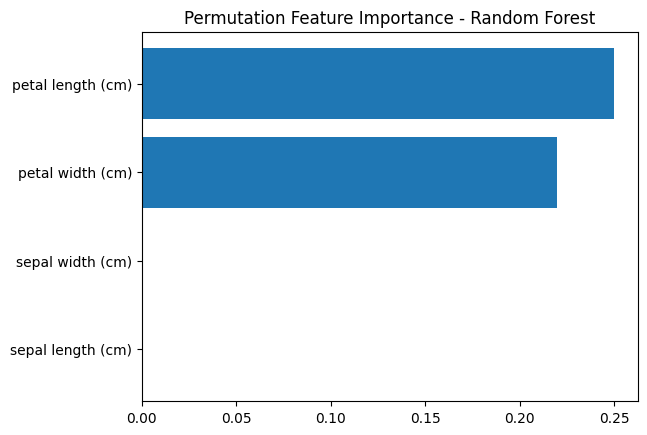

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(X_df.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance - Random Forest")
plt.show()

#**LOFO (Leave-One-Feature-Out Importance):**

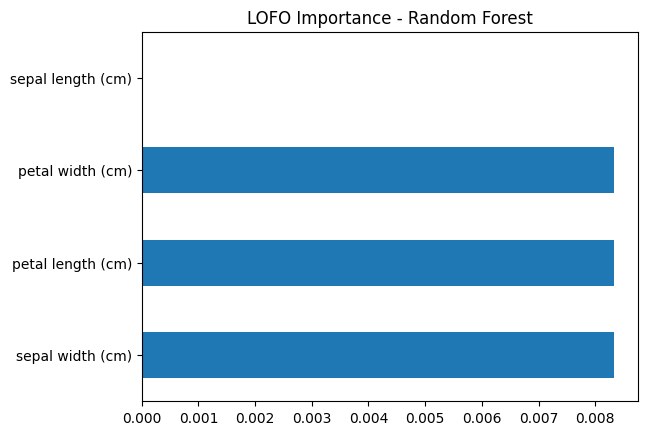

In [ ]:
from sklearn.model_selection import cross_val_score

baseline = cross_val_score(rf, X_train, y_train, cv=5).mean()

lofo_scores = {}
for col in X_df.columns:
    X_lofo = X_train_df.drop(columns=[col])
    score = cross_val_score(rf, X_lofo, y_train, cv=5).mean()
    lofo_scores[col] = baseline - score

lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
lofo_df.plot(kind='barh')
plt.title("LOFO Importance - Random Forest")
plt.show()

#**Global Surrogate Model:**

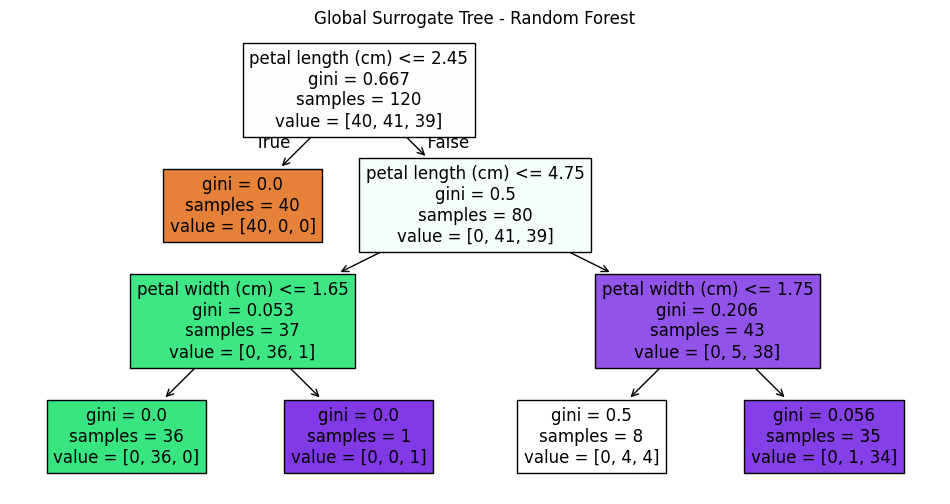

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

# Use blackbox model predictions as targets
surrogate = DecisionTreeClassifier(max_depth=3)
rf_preds = rf.predict(X_train)
surrogate.fit(X_train, rf_preds)

from sklearn import tree
plt.figure(figsize=(12,6))
tree.plot_tree(surrogate, feature_names=X_df.columns, filled=True)
plt.title("Global Surrogate Tree - Random Forest")
plt.show()

#**H-Statistic (Feature Interaction):**

The H-statistic defines the interaction between features as the share of variance that is explained by the interaction.


**Referance:**

https://github.com/a-data-odyssey/XAI-tutorial/blob/main/src/model_agnostic/h_stat.ipynb

In [ ]:
!pip install artemis

In [ ]:
!pip install pyartemis

In [ ]:
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
import random

In [ ]:
# Get random selection of 100 observations
random.seed(8)
X_exp = random.choices(X, k=100)
X_exp = pd.DataFrame(X_exp, columns=X_df.columns)

# Calculate Friedman H statistic
h_stat = FriedmanHStatisticMethod()
h_stat.fit(rf, X_exp)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

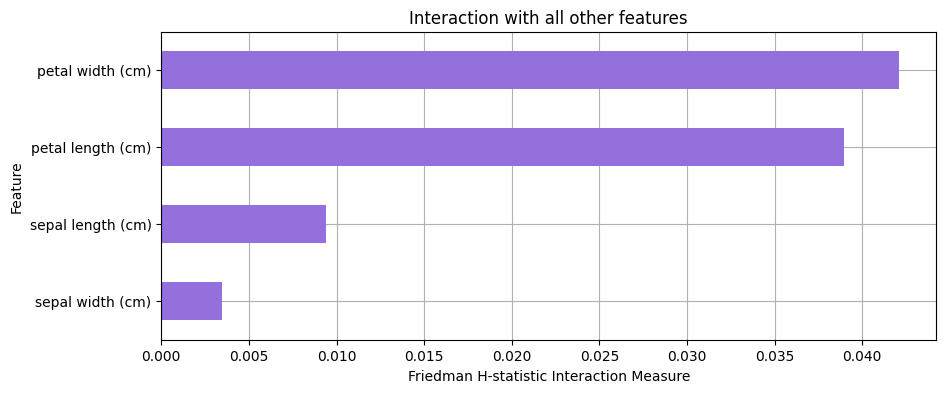

In [ ]:
# Overall interaction plot
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

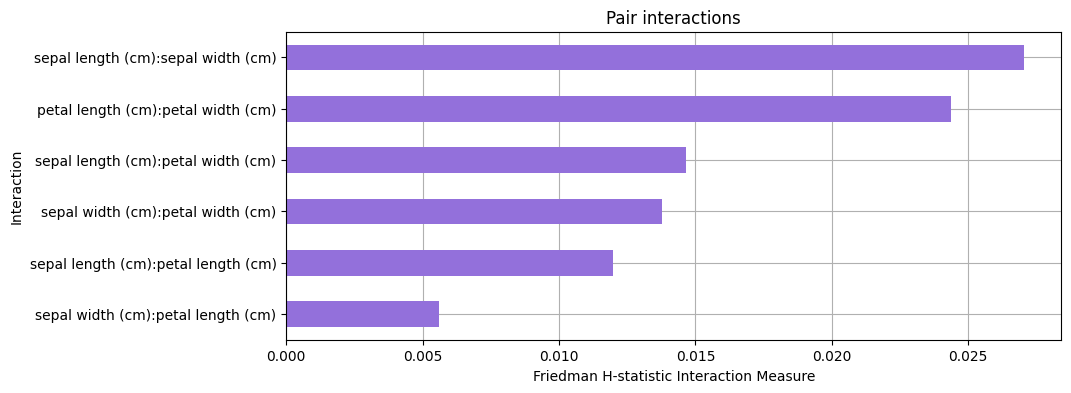

In [ ]:
# Pairwise interactions
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot(vis_type='bar_chart',ax=ax)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


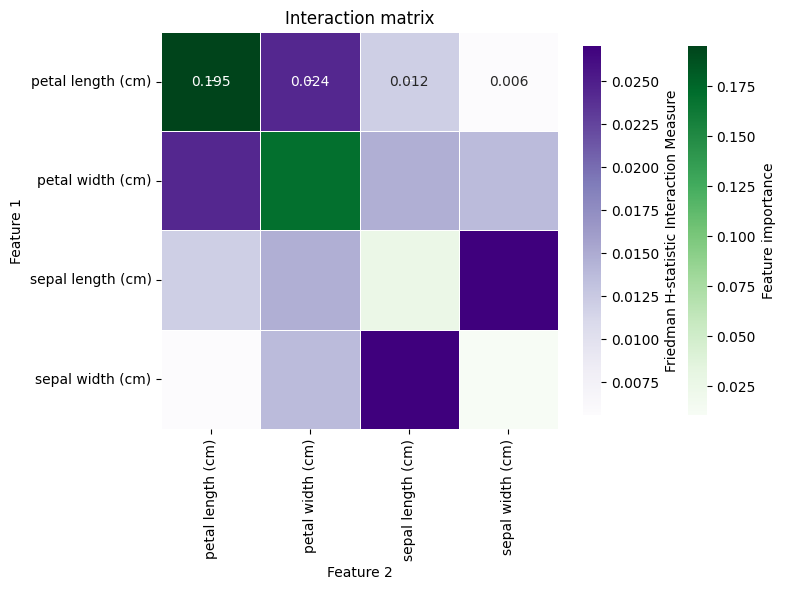

In [ ]:
# Interaction heatmap
h_stat.plot()

#**Unnormalized H-statistic:**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

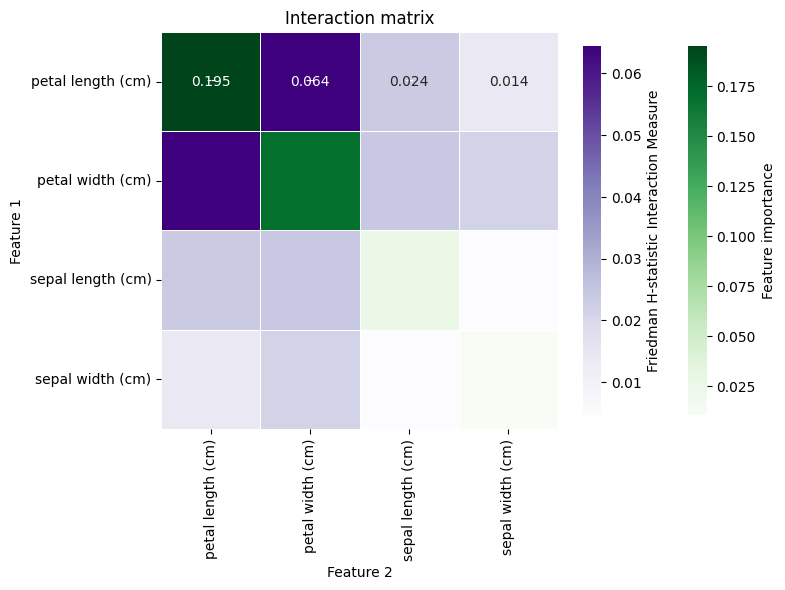

In [ ]:
h_stat_unnormalized = FriedmanHStatisticMethod(normalized=False)
h_stat_unnormalized.fit(rf, X_exp)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


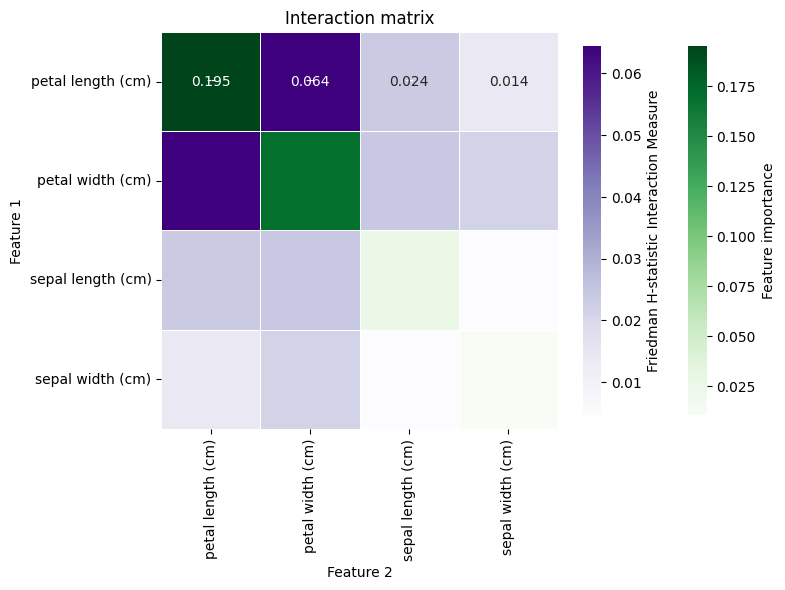

In [ ]:
# Plot heatmap
h_stat_unnormalized.plot();

Text(0, 0.5, 'sepal length (cm)')

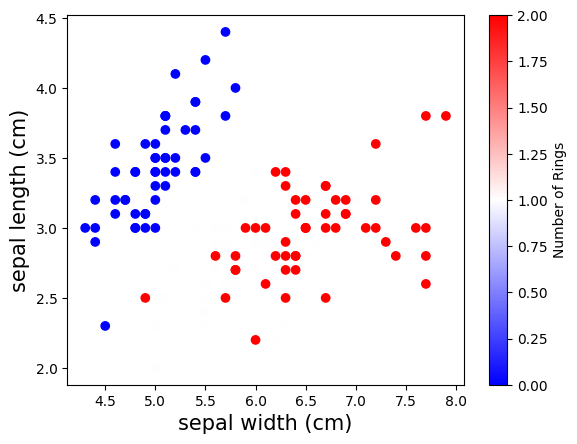

In [ ]:
# Interaction between 'sepal width (cm)' and 'sepal length (cm)'
plt.scatter(X_df['sepal length (cm)'], X_df['sepal width (cm)'], c=y, cmap="bwr")
plt.colorbar(label="Number of Rings", orientation="vertical")

plt.xlabel("sepal width (cm)", size=15)
plt.ylabel("sepal length (cm)", size=15)

**R Implementation for Built-in Function:**

https://github.com/ModelOriented/hstats